# Lecture 1 – Data 100, Spring 2025

Data 100, Spring 2025

[Acknowledgments Page](https://ds100.org/sp25/acks/)

## Software Packages 
We will be using a wide range of different Python software packages.  To install and manage these packages we will be using the Conda environment manager. The following is a list of packages we will routinely use in lectures and homework assignments:

In [1]:
# Linear algebra, probability
import numpy as np

# Data manipulation
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive visualization library
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

We will learn how to use all of the technologies used in this demo.

For now, just sit back and think critically about the data and our guided analysis.

# 1. Starting with a Question: **Who are you (the students of Data 100)?**

<img src="images/ask.png" width="300px" />

This is a pretty vague question, but let's start with the goal of learning something about the students in the class.

Here are some "simple" questions:
1. How many students do we have?
1. What are your majors?
1. What year are you?
1. How did your major enrollment trend change over time?


# 2. Data Acquisition and Cleaning 

**In Data 100 we will study various methods to collect data.**

<img src="images/data_acquisition.png" width="300px" />

To answer this question, I downloaded the course roster and extracted everyone's names and majors.

In [2]:
# pd stands for pandas, which we will learn starting in the next lecture.
# Some pandas syntax is similar to data8's datascience package.
majors = pd.read_csv("data/majors.csv")
names = pd.read_csv("data/names.csv")

# 3. Exploratory Data Analysis

**In Data 100, we will study exploratory data analysis and practice analyzing new datasets.**

<img src="images/understand_data.png" width="300px" />

I didn't tell you the details of the data! Let's check out the data and infer its structure. Then, we can start answering the simple questions we posed.

### Peeking at the Data

In [3]:
# Let's peek at the first 20 rows of the majors dataframe.
majors.head(20)

,Majors,Terms in Attendance
0,"Computer Science BA, Linguistics BA",8
1,Civil Engineering BS,6
2,Economics BA,7
3,"Environ Econ & Policy BS, Letters & Sci Undecl...",8
4,Letters & Sci Undeclared UG,4
5,Letters & Sci Undeclared UG,4
6,"Data Science BA, Economics BA",6
7,Economics BA,8
8,Letters & Sci Undeclared UG,4
9,Applied Mathematics BA,6


In [4]:
# Let's peek at the first 5 rows (default) of the names dataframe.
names.head()

,Name,Role
0,Daniel,Student
1,Michael,Student
2,Harry,Student
3,SAMUEL,Student
4,Kyle,Student


### What is one potential issue we may need to address in this data?

**Answer:**
Some names appear capitalized. 

In the above sample, we notice that some of the names are capitalized and some are not. This will be an issue in our later analysis, so let's convert all names to lowercase.

In [5]:
names['Name'] = names['Name'].str.lower()

In [6]:
names.head()

,Name,Role
0,daniel,Student
1,michael,Student
2,harry,Student
3,samuel,Student
4,kyle,Student


### Exploratory Data Analysis on `names` dataset

#### How many records do we have?

In [7]:
print(len(names))
print(len(majors))

1206
1206


Based on what we know of our class, each record is most likely a student.

#### Understanding the structure of data

It is important that we understand the meaning of each field and how the data is organized.

In [8]:
names["Role"].value_counts()

Role
Student             1182
Waitlist Student      23
#REF!                  1
Name: count, dtype: int64

It appears that one student has an erroneous role given as "#REF!". What else can we learn about this student? Let's see their name.

In [9]:
# Boolean index to find rows where Role is #REF!
names[names['Name'] == "#ref!"]

,Name,Role
780,#ref!,#REF!


Though this single bad record won't have much of an impact on our analysis, we can clean our data by removing this record.

In [10]:
names = names[names['Name'] != "#ref!"]

**Double check**: Let's double check that our record removal only removed the single bad record.

In [11]:
names['Role'].value_counts().to_frame()  # Again, counts of unique Roles.

,count
Role,
Student,1182
Waitlist Student,23


#### Most Frequent Names

Let's see the distribution of names in our class.

In [12]:
names['Name'].value_counts().to_frame()   # Counting the frequency of each unique name.

,count
Name,
daniel,10
kevin,9
joshua,8
ashley,8
ryan,8
...,...
akili,1
madeline,1
sharaf,1


Remember we loaded in two files. Let's explore the fields of `majors` and check for bad records:

### Exploratory Data Analysis on `majors` dataset

In [13]:
majors.columns   # Get column names

Index(['Majors', 'Terms in Attendance'], dtype='object')

In [14]:
majors['Terms in Attendance'].value_counts().to_frame()

,count
Terms in Attendance,
4,399
6,379
8,189
G,113
2,85
—,16
7,15
5,6
3,2


It looks like numbers represent semesters, `G` represents graduate students. But we do still have a bad record:

In [15]:
majors[majors['Terms in Attendance'] == "#REF!"]

,Majors,Terms in Attendance
697,#REF!,#REF!


In [16]:
majors = majors[majors['Terms in Attendance'] != "#REF!"]
majors['Terms in Attendance'].value_counts().to_frame()

,count
Terms in Attendance,
4,399
6,379
8,189
G,113
2,85
—,16
7,15
5,6
3,2


Detail: The deleted `majors` record number is different from the record number of the bad `names` record. So, while the number of records in each table matches, the row indices don't match, so we'll have to keep these tables separate in order to do our analysis.

### Summarizing the Data

We will often want to numerically or visually summarize the data. The `describe()` method provides a brief high-level description of our dataframe. 

In [17]:
names.describe()

,Name,Role
count,1205,1205
unique,875,2
top,daniel,Student
freq,10,1182


**Q: What do you think `top` and `freq` represent?**

**Answer:** `top`: most frequent entry, `freq`: the frequency of that entry.

In [18]:
majors.describe()

,Majors,Terms in Attendance
count,1205,1205
unique,154,10
top,Letters & Sci Undeclared UG,4
freq,294,399


---
# 4. Analysis: Understanding the World

<img src="images/understand_world.png" width="300px" />


### What are your majors?

What are the top majors:

In [19]:
majors_count = (       # Method chaining in pandas
    majors['Majors']
    .value_counts()
    .sort_values(ascending=False) # Highest first
    .to_frame()
    .head(20)          # Get the top 20
)

majors_count

,count
Majors,
Letters & Sci Undeclared UG,294
Data Science BA,123
Civil Engineering BS,82
Economics BA,50
Computer Science BA,46
Applied Mathematics BA,42
Electrical Eng & Comp Sci BS,42
Cognitive Science BA,41
Statistics BA,38


### We will often use visualizations to make sense of the data
In Data 100, we will deal with many different kinds of data (not just numbers), and we will study techniques to describe types of data.

**How can we summarize the `Majors` field?** A good starting point might be to use a bar plot:

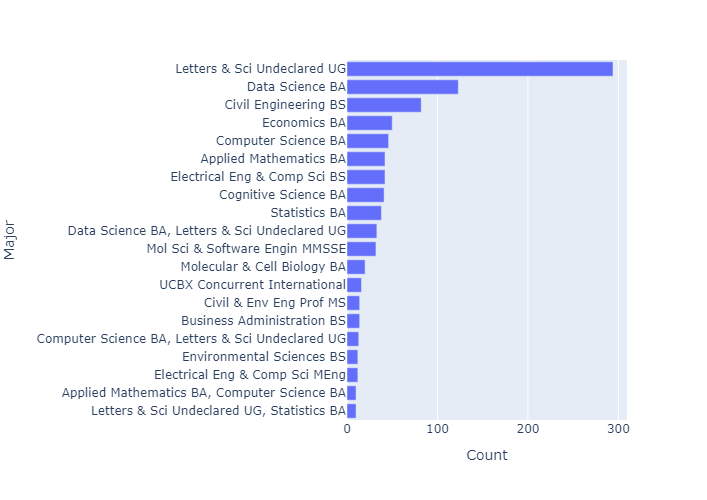

In [20]:
# Interactive using plotly
fig = px.bar(majors_count.loc[::-1], orientation='h')
fig.update_layout(showlegend=False, 
                  xaxis_title='Count', 
                  yaxis_title='Major',
                  autosize=False, 
                  width=800, 
                  height=500)

### What year are you?

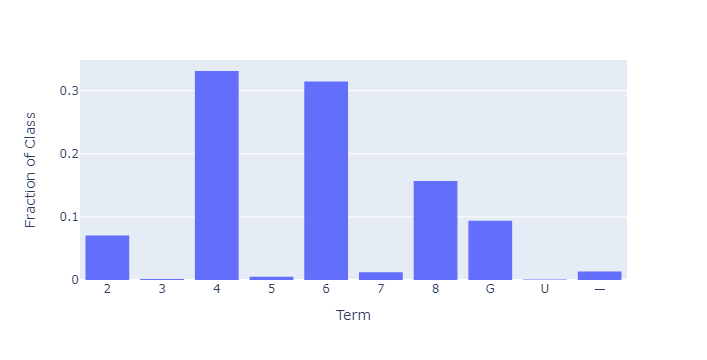

In [21]:
fig = px.histogram(majors['Terms in Attendance'].sort_values(),
                   histnorm='probability')

fig.update_layout(showlegend=False,
                  xaxis_title="Term",
                  yaxis_title="Fraction of Class",
                  autosize=False, 
                  width=800, 
                  height=250)

# 1. New Question

**What is the ratio between graduate and undergraduate students in Data 100, and how does it compare with campus distribution over time?**

<img src="images/ask.png" width="300px" />

We often ask this question because we want to improve the data science program here in Berkeley, especially since it has now grown into a new college—[College of Computing, Data Science, and Society](https://data.berkeley.edu/)—Berkeley's first new college in 50 years.

In [22]:
# Replacing terms in attendance data with the degree objective
majors.loc[majors.loc[:, 'Terms in Attendance'] != 'G', 'Terms in Attendance'] = 'Undergraduate'
majors.loc[majors.loc[:, 'Terms in Attendance'] == 'G', 'Terms in Attendance'] = 'Graduate'

majors.rename(columns={'Terms in Attendance': 'Ungrad Grad'}, inplace=True)

majors.describe()

,Majors,Ungrad Grad
count,1205,1205
unique,154,2
top,Letters & Sci Undeclared UG,Undergraduate
freq,294,1092




## How could we answer this question?



## We don't have the data.

Where can we get the data?

<img src="images/data_acquisition.png" width="300px" />


---

# UC Berkeley Student Headcount by Major and Demographics


[Data](https://pages.github.berkeley.edu/OPA/our-berkeley/student-headcount-by-major.html) comes from UC Berkeley's data warehouse reporting system, Cal Answers. Headcount figures are based on the Fall and Spring census snapshots, which occur at the end of the 5th week of the term.

# 2. Acquire Data Programmatically

Note 1: In the following, we download the data programmatically to ensure that the process is reproducible.

Note 2: We also load the data directly into a dataframe.

**In Data 100, we will think a bit more about how we can be efficient in our data analysis to support processing large datasets.**

In [23]:
url = "https://docs.google.com/spreadsheets/d/1J7tz3GQLs3M6hFseJCE9KhjVhe4vKga8Q2ezu0oG5sQ/gviz/tq?tqx=out:csv"

university_majors = pd.read_csv(url, 
                                usecols = ['Academic Yr', 'Semester', 'Ungrad Grad', 
                                           'Entry Status', 'Major Short Nm', 'Student Headcount'])

# 3. Exploratory Data Analysis on Campus Data

<img src="images/understand_data.png" width="300px" />


In [24]:
# Examining the data
university_majors

,Academic Yr,Semester,Ungrad Grad,Entry Status,Major Short Nm,Student Headcount
0,2014-15,Fall,Graduate,Graduate,Education,335
1,2014-15,Fall,Graduate,Graduate,Educational Leadership Jnt Pgm,1
2,2014-15,Fall,Graduate,Graduate,Special Education,18
3,2014-15,Fall,Graduate,Graduate,Science & Math Education,15
4,2014-15,Fall,Graduate,Graduate,Chemical Engineering,136
...,...,...,...,...,...,...
7199,2023-24,Spring,Undergraduate,Transfer Entrant,Nut Sci-Physio & Metabol,13
7200,2023-24,Spring,Undergraduate,Transfer Entrant,Nutritional Sci-Dietetics,1
7201,2023-24,Spring,Undergraduate,Transfer Entrant,Nutritional Sci-Toxicology,2
7202,2023-24,Spring,Undergraduate,Transfer Entrant,Genetics & Plant Biology,11


The data is reported on a semester basis. We will aggregate data across different semesters in a year by taking the average of Fall and Spring semester enrollment information.

In [25]:
# Reporting student data based on academic year
university_majors = (university_majors.groupby(
    ['Academic Yr', 'Ungrad Grad', 'Entry Status', 'Major Short Nm'], as_index = False)[["Student Headcount"]]
                     .mean()
                    )

university_majors

,Academic Yr,Ungrad Grad,Entry Status,Major Short Nm,Student Headcount
0,2014-15,Graduate,Graduate,African American Studies,30.0
1,2014-15,Graduate,Graduate,Ag & Resource Economics,73.5
2,2014-15,Graduate,Graduate,Anc Hist & Medit Archae,14.0
3,2014-15,Graduate,Graduate,Anthropology,76.5
4,2014-15,Graduate,Graduate,Applied Mathematics,18.5
...,...,...,...,...,...
3697,2023-24,Undergraduate,Transfer Entrant,Spanish and Portuguese,16.5
3698,2023-24,Undergraduate,Transfer Entrant,Statistics,46.0
3699,2023-24,Undergraduate,Transfer Entrant,Sustainable Environ Dsgn,4.0
3700,2023-24,Undergraduate,Transfer Entrant,Theater & Perf Studies,44.0


## What is the historical distribution of graduate and undergraduate students at Berkeley? 

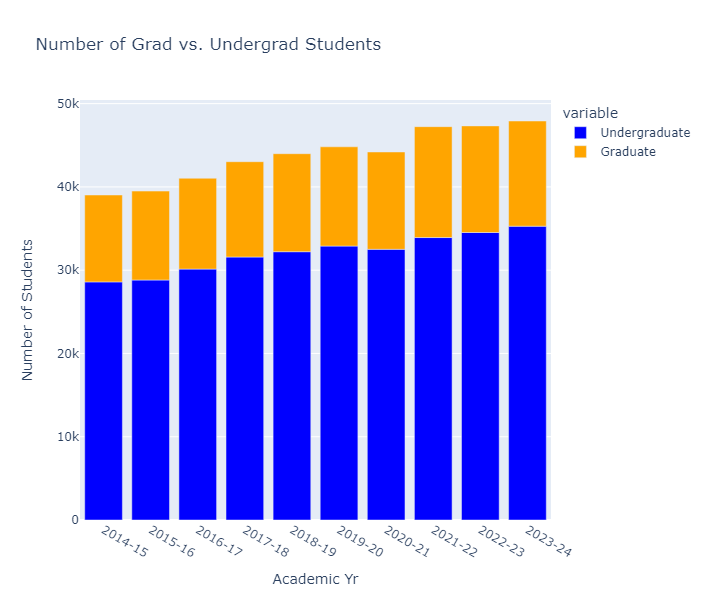

In [26]:
university_grad_vs_ungrd = (university_majors.groupby(
    ['Academic Yr', 'Ungrad Grad'], as_index = False)[["Student Headcount"]]
                            .sum()
                           )

proportions = university_grad_vs_ungrd.pivot(index='Academic Yr', columns='Ungrad Grad', values='Student Headcount')
proportions['Total'] = proportions['Undergraduate'] + proportions['Graduate']
proportions['Undergrad Proportion'] = proportions['Undergraduate'] / proportions['Total']
proportions['Grad Proportion'] = proportions['Graduate'] / proportions['Total']


fig = px.bar(proportions.reset_index(), 
             x='Academic Yr', 
             y=['Undergraduate', 'Graduate'],
             title='Number of Grad vs. Undergrad Students',
             labels={'value': 'Number of Students'},
             color_discrete_map={'Undergraduate': 'blue', 'Graduate': 'orange'})

fig.update_layout(barmode='relative', autosize=False, width=800, height=600)
fig.show()


# 4. Analysis 

The ratio between graduate and undergraduate students in Data 100, and its comparison with campus distribution over time:

In [27]:
data100_grad = majors['Ungrad Grad'].loc[majors['Ungrad Grad'] == 'Graduate'].count()

data100_undergrad = majors['Ungrad Grad'].loc[majors['Ungrad Grad'] == 'Undergraduate'].count()

print("Number of graduate students in Data 100: ", data100_grad)
print("Number of undergraduate students in Data 100: ", data100_undergrad)

Number of graduate students in Data 100:  113
Number of undergraduate students in Data 100:  1092


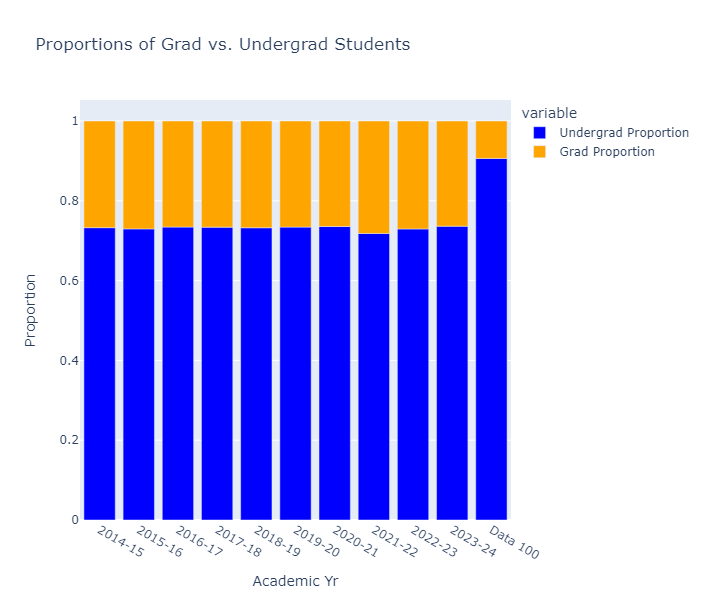

In [28]:
data100_row = {'Graduate':[data100_grad], 
               'Undergraduate':[data100_undergrad], 
               'Total':[data100_grad + data100_undergrad], 
               'Undergrad Proportion':[data100_undergrad / (data100_grad + data100_undergrad)],
               'Grad Proportion':[data100_grad / (data100_grad + data100_undergrad)], 
               }

new_row_df = pd.DataFrame(data100_row)

proportions.loc['Data 100'] = new_row_df.iloc[0]


fig = px.bar(proportions.reset_index(), 
             x='Academic Yr', 
             y=['Undergrad Proportion', 'Grad Proportion'],
             title='Proportions of Grad vs. Undergrad Students',
             labels={'value': 'Proportion'},
             color_discrete_map={'Undergrad Proportion': 'blue', 'Grad Proportion': 'orange'})


fig.update_layout(barmode='relative', autosize=False, width=800, height=600)
fig.show()